In [1]:
import pyzx as zx
import pyzx

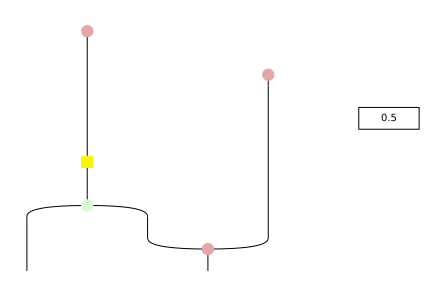

In [2]:
from discopy.quantum import *
from discopy.quantum.zx import *
circuit2zx(Ket(0, 0).H(0).CX(0, 1)).draw()

In [3]:
g = circuit2zx(Ket(0, 0, 0).H(0).CX(0, 1).CX(0, 2)).to_pyzx()
pyzx.drawing.draw(g)

In [4]:
pyzx.clifford_simp(g)
pyzx.drawing.draw(g)

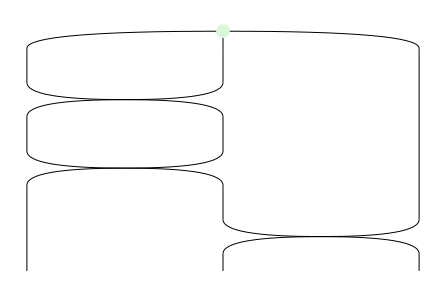

In [5]:
zx.Diagram.from_pyzx(g).draw()

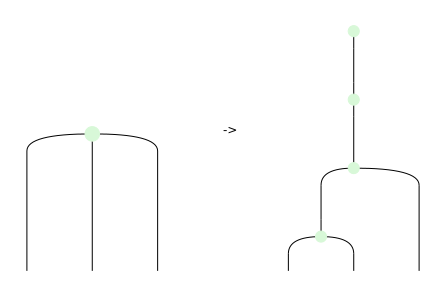

In [6]:
from discopy.quantum.zx import Z
from discopy import drawing
ghz = Z(0, 3)
decomp_ghz = decomp(ghz)
drawing.equation(ghz, decomp_ghz, symbol='->')

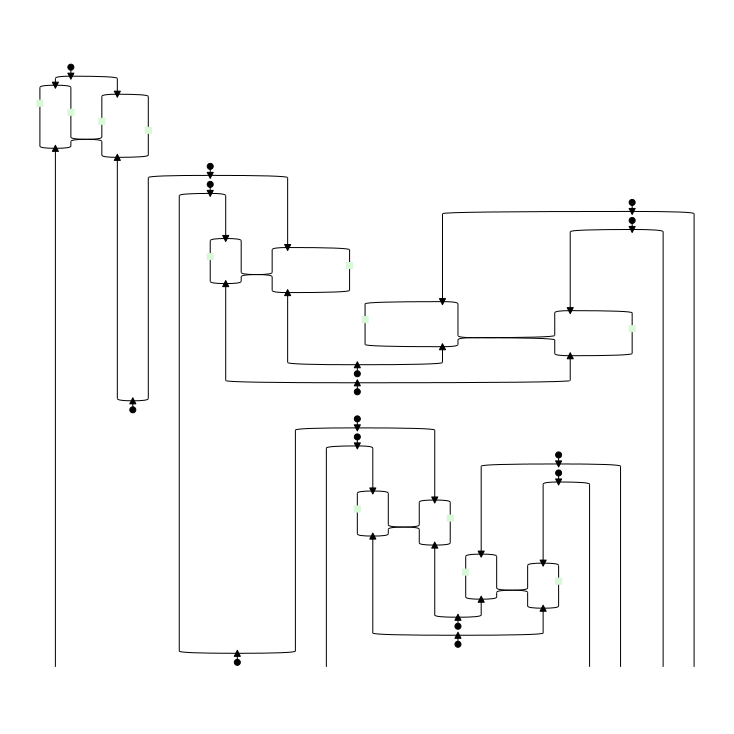

In [7]:
from discopy.quantum.optics import *
path_ghz = zx_to_path(decomp_ghz)
path_ghz.draw(draw_box_labels=False, draw_type_labels=False, figsize=(10, 10))

In [8]:
x, y, drag = qpath_drag(path_ghz)

In [9]:
to_matrix(drag)

Matrix(dom=9, cod=12, array=[1.+0.j, 1.+0.j, 0.+0.j, ..., 1.+0.j, 1.+0.j, 0.+0.j])

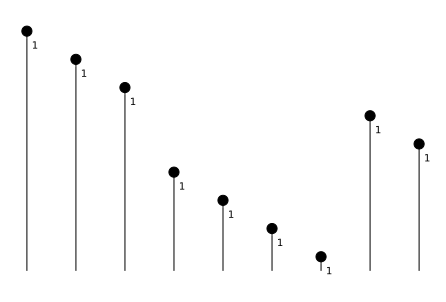

In [10]:
x.draw()

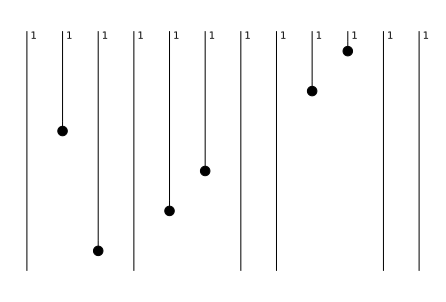

In [11]:
y.draw()